Due in part to recent high-profile shootings of civilians by police in the US, the media and public have been scrutinizing police killings heavily. If you browse social media and news sites, you may get the sense that there's been a large uptick in civilian shootings by police in the US.

As a data scientist, you may want to investigate police killings more and get to the facts. Luckily, there's a dataset that will help you do this. The team at [FiveThirtyEight](http://fivethirtyeight.com) assembled a dataset using crowdsourced data and census data. It contains information on each police killing in the US, and can be found [here](https://github.com/fivethirtyeight/data/tree/master/police-killings).

Each of the 467 rows in the dataset contains information on a police killing of a civilian in the US in from January 2015 to June 2015. There are many interesting columns in the dataset, but here are some of the more relevant ones:
* name -- the name of the civilian
* age -- the age of the civilian
* gender -- the gender of the civilian
* raceethnicity -- the race and ethnicity of the civilian
* month, day, and year -- when the shooting occurred
* streetaddress, city, state -- where the shooting occurred
* lawenforcementagency -- the agency that was involved
* cause -- the cause of death
* armed -- whether or not the civilian was armed
* pop -- population of the census area where the incident occurred
* county_income -- median household income in the county

In [1]:
# Import the packages we need
import pandas as pd

In [2]:
# Read police_killings.csv into a Pandas DataFrame
police_killings = pd.read_csv('../data/police_killings.csv', encoding='ISO-8859-1')

# Print out and look at the columns in the data
print(police_killings.columns)

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')


In [3]:
# Print out the first few rows of the data
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


# Shootings By Race

In [4]:
# See how many times each race occurs
police_killings['raceethnicity'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

In [5]:
# import matplotlib for graphing
import matplotlib.pyplot as plt
%matplotlib inline

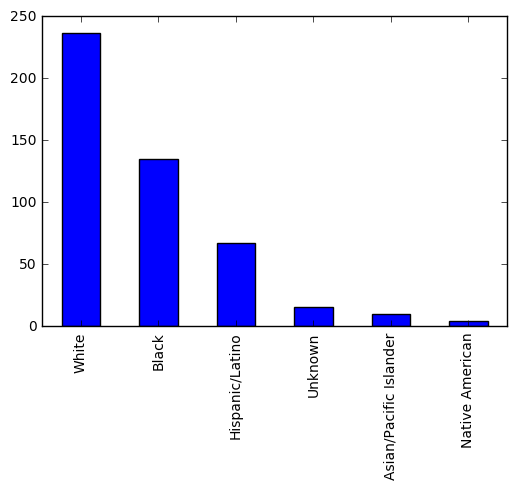

In [6]:
# Maek a bar graph of the results
police_killings['raceethnicity'].value_counts().plot.bar()

So there are more police killings of white people than any other race.  At first this seems a little surprsing.

But if we were to look at the percentages, how would they comapre to the percentage of each race in the US population as a whole?

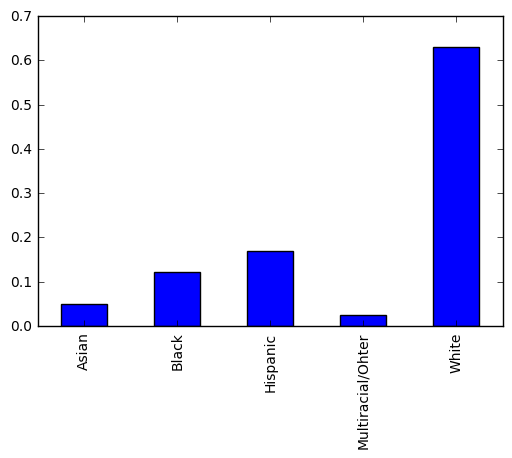

In [7]:
# Create a Pandas Series of US racial percentages and plot a bar graph
us_race_population = pd.Series({'White': 0.63, 'Hispanic': 0.17, 
                               'Black':0.123, 'Asian': 0.05,
                               'Multiracial/Ohter': 0.024})
us_race_population.plot.bar()

So when comparing the percentages for which races were slain by police to the overal US racial percentages, it looks like black people were disproporationally killed by police.

# Shootings by Regional Income

In [8]:
# Need to clean up "-" p_income values
income = police_killings['p_income'][police_killings['p_income'] != '-']
income.head()

0    28375
1    14678
2    25286
3    17194
4    33954
Name: p_income, dtype: object

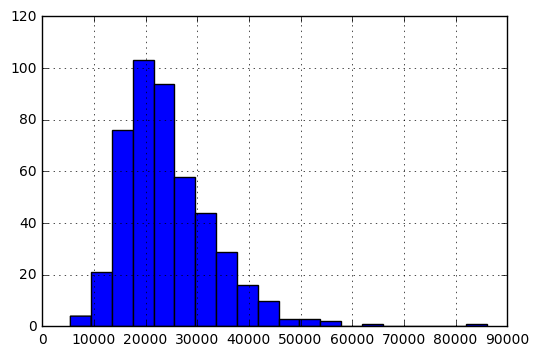

In [9]:
# Convert income to an integer type
income = income.astype(int)

# Use the hist() method on income to generate a histogram
income.hist(bins=20)

The histogram shows a peak around 20k. The per capita income for the overall US population in 2008 was $26,964 according to the census.

In [10]:
median_kill_income = income.median()
median_kill_income

22348.0

In [11]:
median_us_income = 26964
median_us_income

26964

These incomes don't seem that different.  Which is somewhat of a surprise.  Were the incomes from the two sources calculated in the same way?  This may be worth looking into.

# Shootings By State
Since we have geographic data, we can look at breakdowns of shootings by region.  Since we don't have a ton of data, it might be best to go for just the largest regions (states).

There is one caveat to be aware of when looking at population-level data.  Finding that more people were sot in Texas than Georgia doesn't automatically mean that cops are more likely to shoot people in Texas.  This is because Texas has a higher population than Georgia.  So you need to adjust for the state population.

In [12]:
# Read in state_population.csv as a DataFrame
state_pop = pd.read_csv('../data/state_population.csv')
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [13]:
# Get the number of police killings in each state by state code
counts = police_killings['state_fp'].value_counts()

In [14]:
# Make a new DataFrame to hold counts (for eventual merging)
states = pd.DataFrame({'STATE': counts.index, "shootings": counts})
states.head()

,STATE,shootings
6,6,74
48,48,47
12,12,29
4,4,25
40,40,22


In [15]:
# Merge the state_pop and states DataFrames
states = states.merge(state_pop, on='STATE')
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4


In [16]:
# Create a new column in states called pop_millions
states['pop_millions'] = states['POPEST18PLUS2015'] / 1000000
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions
0,6,74,40,4,9,California,39144818,30023902,76.7,30.023902
1,48,47,40,3,7,Texas,27469114,20257343,73.7,20.257343
2,12,29,40,3,5,Florida,20271272,16166143,79.7,16.166143
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,5.205215
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,2.950017


In [17]:
# Create a new column called rate
states['rate'] = states['shootings'] / states['pop_millions']
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
0,6,74,40,4,9,California,39144818,30023902,76.7,30.023902,2.464703
1,48,47,40,3,7,Texas,27469114,20257343,73.7,20.257343,2.320146
2,12,29,40,3,5,Florida,20271272,16166143,79.7,16.166143,1.793873
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,5.205215,4.802876
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,2.950017,7.457584


In [18]:
columns_we_care_about = ['NAME', 'rate', 'shootings', 'pop_millions']

In [19]:
# Find states with most killings
most_killings = states.sort_values(by='rate', ascending=False)
most_killings[columns_we_care_about].head(10)

,NAME,rate,shootings,pop_millions
4,Oklahoma,7.457584,22,2.950017
3,Arizona,4.802876,25,5.205215
27,Nebraska,4.208007,6,1.425853
39,Alaska,3.622099,2,0.552166
34,Hawaii,3.568975,4,1.120770
33,Idaho,3.273073,4,1.222093
32,New Mexico,3.148216,5,1.588201
10,Louisiana,3.093441,11,3.555911
7,Colorado,2.857477,12,4.199509
24,Kansas,2.737121,6,2.192084


In [20]:
# Find states with least killings
least_killings = states.sort_values(by='rate', ascending=True)
least_killings[columns_we_care_about].head(10)

,NAME,rate,shootings,pop_millions
43,Connecticut,0.353754,1,2.826827
22,Pennsylvania,0.692231,7,10.112229
6,New York,0.834137,13,15.584974
38,Iowa,0.835037,2,2.395103
29,Massachusetts,0.924670,5,5.407335
45,Maine,0.932012,1,1.072948
42,New Hampshire,0.937550,1,1.066610
11,Illinois,1.110963,11,9.901322
12,Ohio,1.112973,10,8.984946
31,Wisconsin,1.116891,5,4.476711


So the states with the most killings are:
1. Oklahoma
1. Arizona
1. Nebraska
1. Alaska
1. Hawaii

And the states with the least killigs are:
1. Connecticut
1. Pennsylvania
1. New York
1. Iowa
1. Massachusetts

Why?  What separates these groups of states?

The states with the most killings all have very high native american populations with very low per-capita income, at least in the more rural regions.

The states with the least killings are all rich states with high per-capita incomes and very low populations of native americans.

Since there are overall very few police killings of native americans, that doesn't seem to be the key factor.  Economics seem like they are likely of much higher importance.

If we were to explore the data further, potential things to looke for include:
* Percentage of population between say 10 and 25
  * Young males are most likely to be involved in violent crime
* Birth rate compared to national average
  * I suspect higher birth rates correlate with higher crime, but don't have the data
* Annual household income
  * We are already looking at it, but economics seem important
* Poverty rate
  * Percentage of people below poverty line probably matters more than average income
* Cost of living
  * Annual household income should be adjusted in some way by cost of living.  Making 25,000 in rural West Virginia isn't too bad, but making 25,000 in San Francisco is a very different story.



# State By State Differences
Why do some states have a much higher rate of police killings than others?  Is it due to random change, or is there an underlying factor that could explain it?

Let's dive more into the data ...

To better look at the differences, lets split off the data for the 10 states with the lowest shooting rate and the data for the 10 states with the highest shooting rate and see if we can notice any stark contrasts.

In [21]:
# Create a new DataFrame called pk where all rows with "-" values are
# removed and columns converted to float
pk = police_killings[police_killings['share_white'] != '-']
pk = pk[pk['share_black'] != '-']
pk = pk[pk['share_hispanic'] != '-']
pk = pk[pk['p_income'] != '-']
pk.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [22]:
# Convert the share columns to float
pk['share_white'] = pk['share_white'].astype(float)
pk['share_black'] = pk['share_black'].astype(float)
pk['share_hispanic'] = pk['share_hispanic'].astype(float)
pk['p_income'] = pk['p_income'].astype(int)
pk['pov'] = pk['pov'].astype(float)
pk.dtypes

name                     object
age                      object
gender                   object
raceethnicity            object
month                    object
day                       int64
year                      int64
streetaddress            object
city                     object
state                    object
latitude                float64
longitude               float64
state_fp                  int64
county_fp                 int64
tract_ce                  int64
geo_id                    int64
county_id                 int64
namelsad                 object
lawenforcementagency     object
cause                    object
armed                    object
pop                       int64
share_white             float64
share_black             float64
share_hispanic          float64
p_income                  int64
h_income                float64
county_income             int64
comp_income             float64
county_bucket           float64
nat_bucket              float64
pov     

In [23]:
# Create a DataFrame containing only rows from pk that took place in 
# one of the 10 states with the lowest shooting rates.
low_st = ['CT', 'PA', 'NY', 'IA', 'MA', 'ME', 'NH', 'IL', 'OH', 'WI']
pk_lowest = pk[pk['state'].isin(low_st)]
pk_lowest.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
26,Andrew Toto,54,Male,White,January,21,2015,Scobie Pond Rd and Julian Rd,Derry,NH,...,1.9,32921,61167.0,77348,0.790803,1.0,4.0,5.4,0.087385,0.284854
31,Angelo West,41,Male,Black,March,27,2015,Humboldt Ave and Ruthven St,Roxbury,MA,...,35.2,14995,20388.0,53540,0.380799,1.0,1.0,41.3,0.220398,0.182336
35,Anthony Gomez Jr,29,Male,Black,May,19,2015,305 E Walnut St,Lancaster,PA,...,37.1,21868,42027.0,56483,0.744065,1.0,2.0,9.3,0.206855,0.172319


In [24]:
# Create a DataFrame containing only rows from pk that took place in 
# one of the 10 states with the hightest shooting rates.
high_st = ['OK', 'AZ', 'NE', 'AK', 'HI', 'ID', 'NM', 'LA', 'CO', 'KS']
pk_highest = pk[pk['state'].isin(high_st)]
pk_highest.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,...,79.0,15523,20833.0,53596,0.388704,1.0,1.0,58.0,0.073651,0.102955
21,Andre Murphy Sr,42,Male,Black,January,7,2015,1223 Omaha Ave,Norfolk,NE,...,2.9,23342,54809.0,46566,1.177018,4.0,3.0,10.3,0.035221,0.258886
22,Andres Lara-Rodriguez,21,Male,Hispanic/Latino,February,13,2015,S 12th St and Ruby St,Kansas City,KS,...,41.4,22719,32471.0,39402,0.824095,2.0,1.0,36.5,0.178186,0.070931
24,Andrew Jackson,26,Male,White,April,29,2015,1200 W Florida Ave,Chickasha,OK,...,9.7,17695,32034.0,49637,0.645365,1.0,1.0,20.3,0.011335,0.169402


In [25]:
# Create a list of columns which may be important
col_might_matter = ['share_white', 'share_black', 'share_hispanic', 
                    'p_income', 'h_income', 'county_income', 
                    'comp_income', 'pov', 'urate', 'college']

In [26]:
# Look at summary statistics for states with lowest killings
summary_low = pk_lowest[col_might_matter].describe()
summary_low

,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,pov,urate,college
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,60.616071,21.257143,12.948214,24291.875000,45497.392857,54830.839286,0.831186,19.717857,0.126312,0.204219
std,32.556947,27.770657,15.296417,8817.202189,21594.626616,12451.547261,0.313585,12.726781,0.072598,0.147997
min,0.000000,0.000000,0.000000,11558.000000,18833.000000,34388.000000,0.329534,1.800000,0.030341,0.026404
25%,39.650000,2.100000,1.850000,18578.500000,31661.500000,46085.000000,0.613392,10.625000,0.080075,0.100815
50%,72.950000,9.150000,6.200000,22352.500000,42494.000000,52930.000000,0.784233,14.950000,0.108124,0.159831
75%,87.800000,25.125000,20.075000,28411.500000,58025.000000,59112.000000,1.053979,30.275000,0.166431,0.252750
max,97.200000,98.900000,71.900000,52896.000000,142500.000000,87763.000000,1.677438,49.900000,0.448075,0.744900


In [27]:
# Look at summary statistics for states with highest killings
summary_high = pk_highest[col_might_matter].describe()
summary_high

,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,pov,urate,college
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,55.973958,11.477083,20.842708,23925.083333,43127.458333,48545.906250,0.896638,22.681250,0.103455,0.220315
std,25.315625,19.673399,20.253809,8059.056894,17377.674260,9930.520947,0.326916,13.688915,0.062475,0.141236
min,1.100000,0.000000,0.000000,9353.000000,15293.000000,25498.000000,0.330230,1.300000,0.011335,0.035051
25%,39.175000,0.675000,4.350000,18200.000000,32366.750000,42931.250000,0.648370,11.575000,0.058862,0.117011
50%,58.200000,2.700000,11.500000,22297.000000,39272.000000,48478.500000,0.855789,20.250000,0.089227,0.190484
75%,75.000000,11.500000,36.000000,28289.000000,53574.750000,53596.000000,1.076427,30.675000,0.127920,0.273410
max,95.900000,93.100000,81.500000,54036.000000,111464.000000,77454.000000,2.308703,58.000000,0.324444,0.824971


In [28]:
ratio_high_to_low = summary_high / summary_low
ratio_high_to_low

,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,pov,urate,college
count,1.714286,1.714286,1.714286,1.714286,1.714286,1.714286,1.714286,1.714286,1.714286,1.714286
mean,0.923418,0.539917,1.609698,0.984901,0.947911,0.885376,1.078745,1.150290,0.819046,1.078813
std,0.777580,0.708424,1.324088,0.914015,0.804722,0.797533,1.042511,1.075599,0.860565,0.954315
min,inf,NaN,NaN,0.809223,0.812032,0.741480,1.002113,0.722222,0.373590,1.327489
25%,0.988020,0.321429,2.351351,0.979627,1.022275,0.931567,1.057025,1.089412,0.735084,1.160647
50%,0.797807,0.295082,1.854839,0.997517,0.924178,0.915898,1.091244,1.354515,0.825222,1.191782
75%,0.854214,0.457711,1.793275,0.995688,0.923305,0.906686,1.021298,1.013212,0.768609,1.081741
max,0.986626,0.941355,1.133519,1.021552,0.782204,0.882536,1.376327,1.162325,0.724086,1.107492


So what interesting differences jump out?
States with a high rate of police shootings have:
* A dramatically higher percentage of hispanics (61%)
* A much **lower** percentage of blacks (54%)
* A significantly **lower** unemployment rate (18%)

Wow.  Not what I would have expected!


What are some potential problems with this analysis?
1. We removed all rows with a "-" in them.  What was removed?  Did this bias the results?
1. We're actually looking at columns that contain county-level data for where the shooting occured.  So we're not actually doing a state-by-state comparison of the columns.  This may bias the data.

# Next Steps
Here are some potential next steps:
* Explore some of the columns we didn't look at. [Here's](https://github.com/fivethirtyeight/data/tree/master/police-killings) a full list of columns.
* Integrate more outside data sources. Here are some ideas:
  * Data.gov - http://www.data.gov/
  * Socrata - https://opendata.socrata.com/
  * Github - https://github.com/caesar0301/awesome-public-datasets
  * Census Data - https://www.census.gov
* Map out state-level data in a choropleth map with matplotlib. [Here's](http://ramiro.org/notebook/basemap-choropleth/) an example.
* Look more into the cause column, and see if there are any patterns.
  * Is there any other data on police brutality that could augment this analysis?
* Look more broadly at crime rates where the shootings occured, and see if there are any correlations.